# Logistic Regression Implementation 
## using Perceptron Trick

In [29]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_clusters_per_class=1,n_classes=2,random_state=41,hypercube=False,class_sep=10)

In [30]:
X


array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [31]:
import matplotlib.pyplot as plt


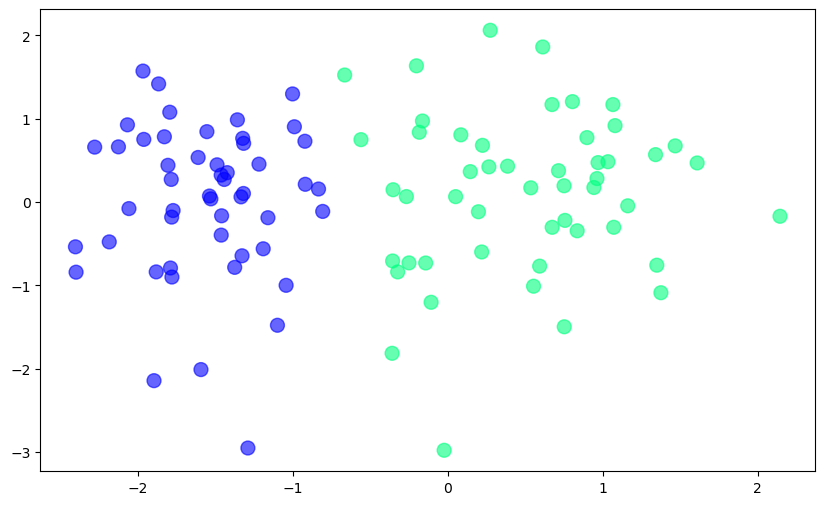

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100,alpha=0.6)

In [33]:
def step(z):
    return 1 if z >= 0 else 0

In [34]:
def perceptron(X, y):
    # X = np.c_[np.ones(X.shape[0]), X]
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    print(weights)
    eta = 0.1
    epochs = 1000
    for i in range(epochs):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + eta * (y[j] - y_hat) * X[j]
    return weights[0], weights[1:]

In [35]:
k = np.insert(X[50], 0, 1)
weights = [1,1,1]
y_hat = step(np.dot(k, weights))
weights = weights + 0.1 * (y[50] - y_hat) * X[50].reshape(-1,1)

print(y_hat)

1


In [36]:
print(X[50])

[ 0.22020513 -0.60000139]


In [37]:
# sample predicted value for y[50] if this goes to step function then it will be 1
z = 1 + 0.5 * np.dot([1, 1], X[50]) 
print(z)
print(step(z))

0.810101869734035
1


In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
# Now we will use sigmoid function instead of step function this will give us the probability of y[50] being 1

z = 1 + 0.5 * np.dot([1, 1], X[50]) 
print(z)
print(f"sigmoid of z: {sigmoid(z)}")

0.810101869734035
sigmoid of z: 0.6921312116997774


## Now if the sigmoid  value is greater than 0.5 then correctly classified point also try to improve the line 

In [40]:
print(y[40])

0


In [41]:
intercept_, coef_ = perceptron(X,y)

[1. 1. 1.]


In [42]:
print(intercept_)
print(coef_)

0.9
[1.35763535 0.12926758]


In [43]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
print(f"y = {m}x + {b}")


y = -10.50251971835589x + -6.962302332818177


In [44]:
x_input = np.linspace(-3,3,1000)
y_input = m*x_input + b

(-3.0, 2.0)

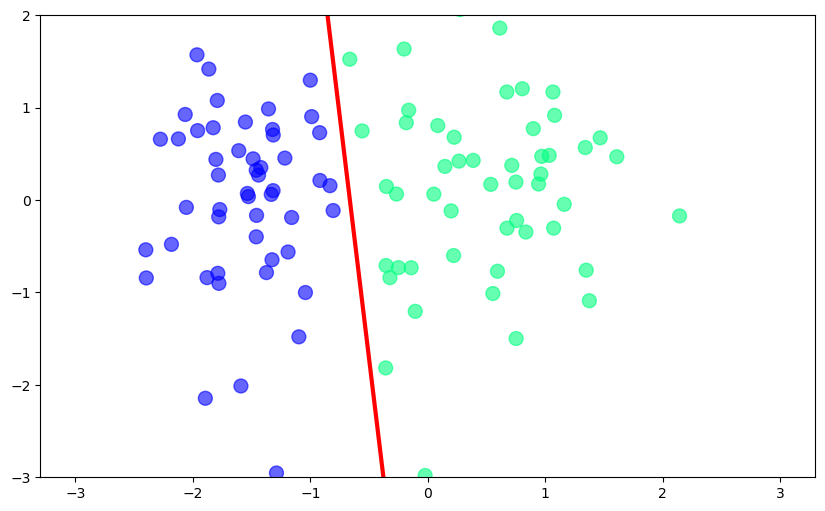

In [45]:

plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, c='red', linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100,alpha=0.6)
plt.ylim(-3,2)

In [46]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [47]:

m,b = perceptron(X,y)

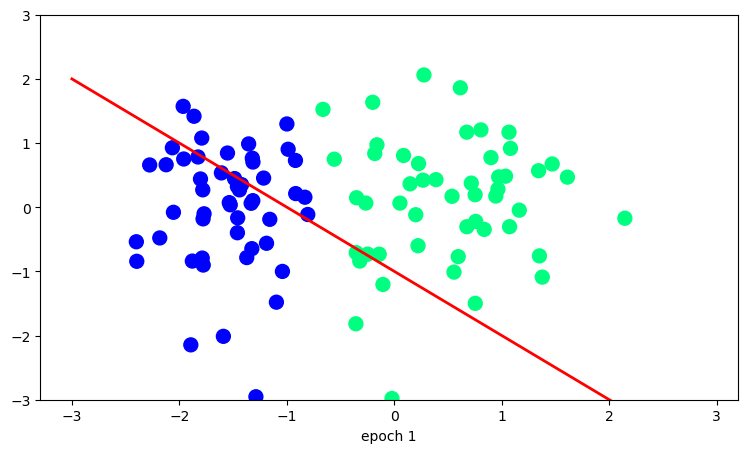

In [48]:

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
## save the animation as html
anim.save('perceptron.html', writer='html')

(-3.0, 2.0)

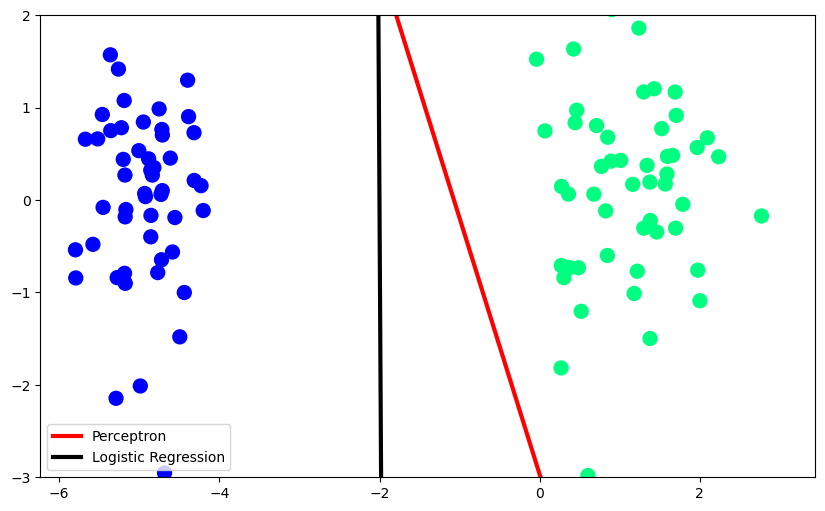

In [27]:


from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)
LogisticRegression()
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])
x_input1 = np.linspace(-3,3,1000)
y_input1 = m*x_input + b
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.legend(['Perceptron','Logistic Regression'])
plt.ylim(-3,2)

#### Perceptron doesnt involve any optimization technique, it just updates the weights based on the misclassification of the data points.
#### Logistic Regression uses the optimization technique to minimize the loss function.
#### Logistic Regression is more stable than Perceptron.
#### Logistic Regression is more reliable than Perceptron.
#### Logistic Regression is more accurate than Perceptron.
#### Logistic Regression is more efficient than Perceptron.
#### Logistic Regrssion even works after the line is seperated to more optimise the symmetrically.

## Using sigmoid function
#### Compare between sigmoid VS perceptron VS sklearn Logistic Regression

(-3.0, 2.0)

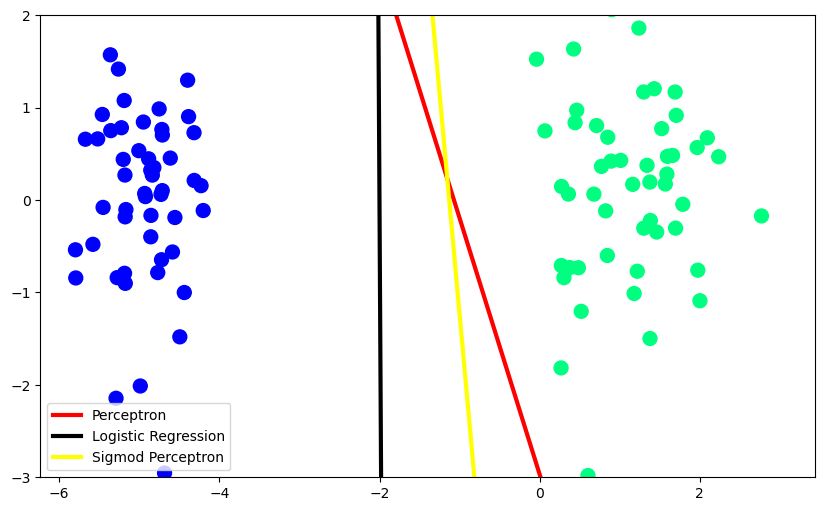

In [28]:
def perceptron(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])  # [1, 1, 1]
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]

    return weights[0], weights[1:]


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


intercept_, coef_ = perceptron(X, y)
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])
x_input2 = np.linspace(-3, 3, 1000)
y_input2 = m * x_input + b
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color="red", linewidth=3)
plt.plot(x_input1, y_input1, color="black", linewidth=3)
plt.plot(x_input2, y_input2, color="yellow", linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="winter", s=100)
plt.legend(["Perceptron", "Logistic Regression", "Sigmod Perceptron"])
plt.ylim(-3, 2)
(-3.0, 2.0)